# Credit
Thank You https://www.youtube.com/c/ValerioVelardoTheSoundofAI

https://www.youtube.com/watch?v=rlypsap6Wow&list=PL-wATfeyAMNqIee7cH3q1bh4QJFAaeNv0&index=8
https://www.youtube.com/watch?v=EycaSbIRx-0&list=PL-wATfeyAMNqIee7cH3q1bh4QJFAaeNv0&index=9

In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

In [2]:
#Loading audios
audio_debussy, sr_debussy = librosa.load('audios/8- Implementing the amplitude envelope_audio_debussy.wav')
audio_duke, sr_duke = librosa.load('audios/8- Implementing the amplitude envelope_audio_duke.wav')
audio_rhcp, sr_rhcp = librosa.load('audios/8- Implementing the amplitude envelope_audio_redhot.wav')

In [3]:
Audio(audio_debussy, rate=sr_debussy)

In [4]:
Audio(audio_duke, rate=sr_duke)

In [5]:
Audio(audio_rhcp, rate=sr_rhcp)

Text(0.5, 1.0, 'rhcp')

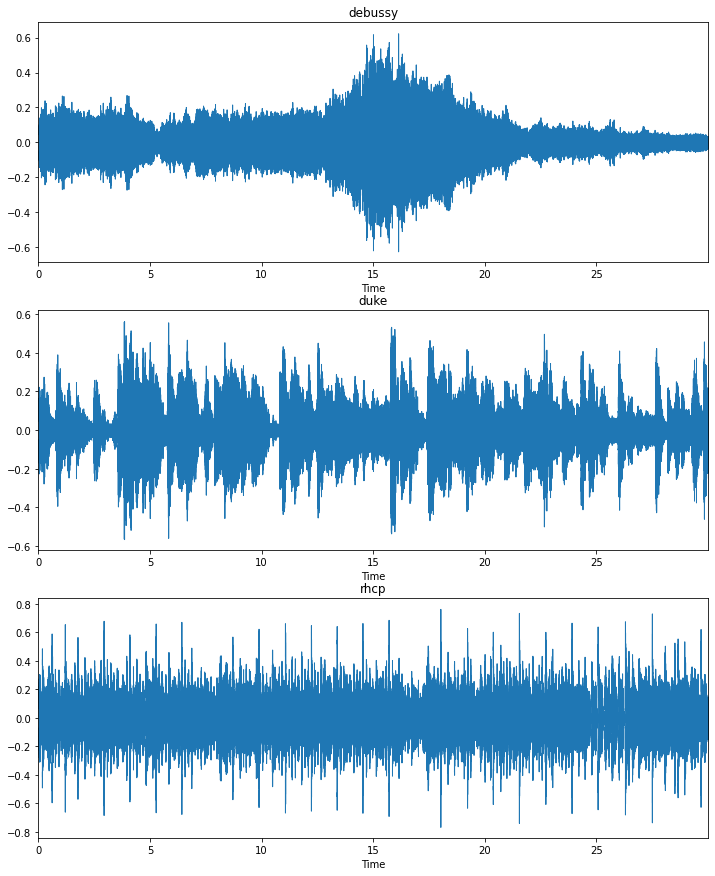

In [6]:
#visualize all wave fomrs
fig, aux = plt.subplots(3, figsize=(12, 15))
librosa.display.waveplot(audio_debussy, sr_debussy, ax=aux[0])
aux[0].set_title('debussy')
librosa.display.waveplot(audio_duke, sr_duke, ax=aux[1])
aux[1].set_title('duke')
librosa.display.waveplot(audio_rhcp, sr_rhcp, ax=aux[2])
aux[2].set_title('rhcp')

In [7]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    amp_evelope = []
    for i in range(0,len(signal), hop_length):
        amp_evelope.append(max(signal[i:i+frame_size]))
    return np.array(amp_evelope)

def amplitude_envelope_v2(signal, frame_size, hop_length):
    return np.array([max(signal[i:i+frame_size]) for i in range(0,len(signal), hop_length)])

In [8]:
ae_debussy = amplitude_envelope(audio_debussy, FRAME_SIZE, HOP_LENGTH)
ae_debussy_v2 = amplitude_envelope_v2(audio_debussy, FRAME_SIZE, HOP_LENGTH)
(ae_debussy==ae_debussy_v2).all()

True

In [9]:
ae_duke = amplitude_envelope_v2(audio_duke, FRAME_SIZE, HOP_LENGTH)
ae_rhcp = amplitude_envelope_v2(audio_rhcp, FRAME_SIZE, HOP_LENGTH)

In [10]:
t = librosa.frames_to_time(range(0,ae_debussy_v2.size), hop_length=HOP_LENGTH)

Text(0.5, 1.0, 'rhcp')

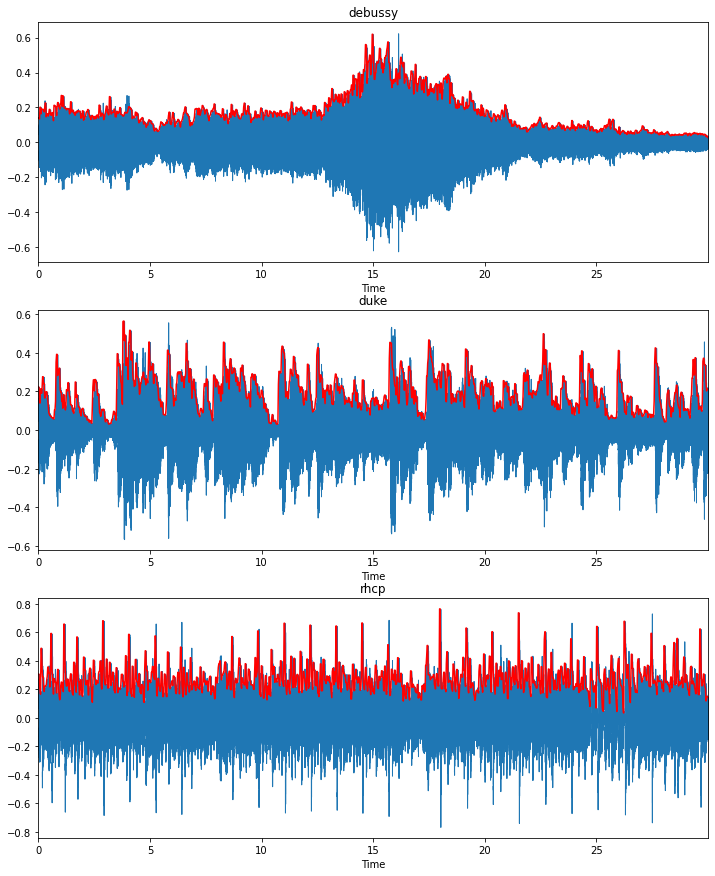

In [11]:
# Visuzlise AE
fig, aux = plt.subplots(3, figsize=(12, 15))
librosa.display.waveplot(audio_debussy, sr_debussy, ax=aux[0])
aux[0].plot(t, ae_debussy, color='r')
aux[0].set_title('debussy')
librosa.display.waveplot(audio_duke, sr_duke, ax=aux[1])
aux[1].plot(t, ae_duke, color='r')
aux[1].set_title('duke')
librosa.display.waveplot(audio_rhcp, sr_rhcp, ax=aux[2])
aux[2].plot(t, ae_rhcp, color='r')
aux[2].set_title('rhcp')

In [39]:
def rms(signal, frame_length, hop_length):
    return np.array([np.sqrt(np.sum(np.power(signal[i:i+frame_length],2))/frame_length) for i in range(0,len(signal), hop_length)])

In [40]:
(rms(audio_debussy, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)-librosa.feature.rms(audio_debussy, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH))

array([[ 0.00358129,  0.00663281,  0.00758304, ...,  0.00103417,
        -0.00045813, -0.0055471 ]])

In [41]:
# calculate the RMS
rms_debussy= rms(audio_debussy, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)
rms_rhcp= rms(audio_rhcp, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)
rms_duke= rms(audio_duke, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)

Text(0.5, 1.0, 'rhcp')

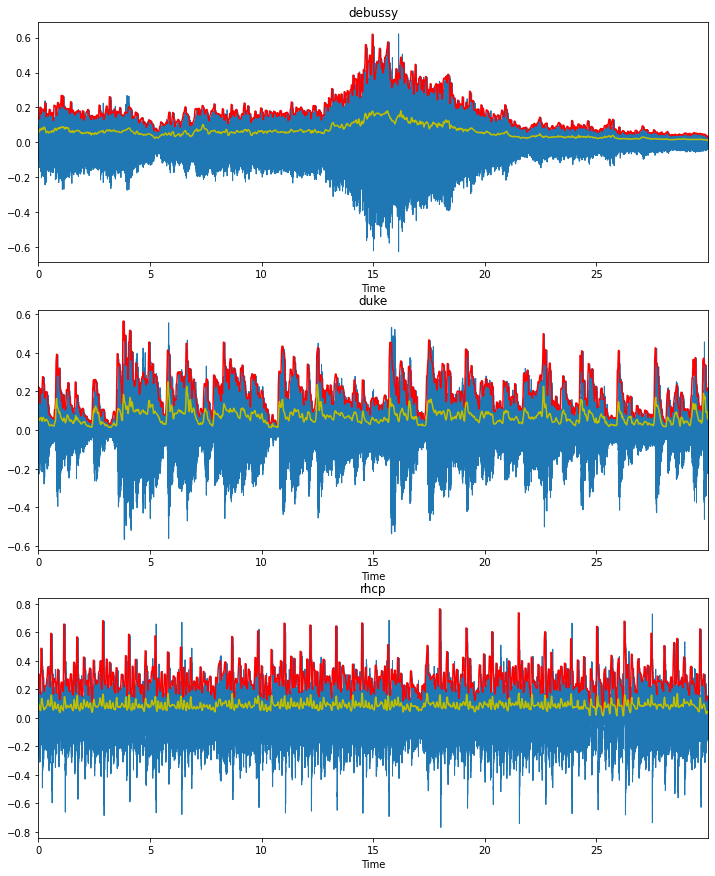

In [42]:
#Compare AE with RMS
fig, aux = plt.subplots(3, figsize=(12, 15))
librosa.display.waveplot(audio_debussy, sr_debussy, ax=aux[0])
aux[0].plot(t, ae_debussy, color='r')
aux[0].plot(t, rms_debussy, color='y')
aux[0].set_title('debussy')
librosa.display.waveplot(audio_duke, sr_duke, ax=aux[1])
aux[1].plot(t, ae_duke, color='r')
aux[1].plot(t, rms_duke, color='y')
aux[1].set_title('duke')
librosa.display.waveplot(audio_rhcp, sr_rhcp, ax=aux[2])
aux[2].plot(t, ae_rhcp, color='r')
aux[2].plot(t, rms_rhcp, color='y')
aux[2].set_title('rhcp')

In [47]:
#compute zero-crossing rate
zcr_debussy= librosa.feature.zero_crossing_rate(audio_debussy, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_rhcp= librosa.feature.zero_crossing_rate(audio_rhcp, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_duke= librosa.feature.zero_crossing_rate(audio_duke, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

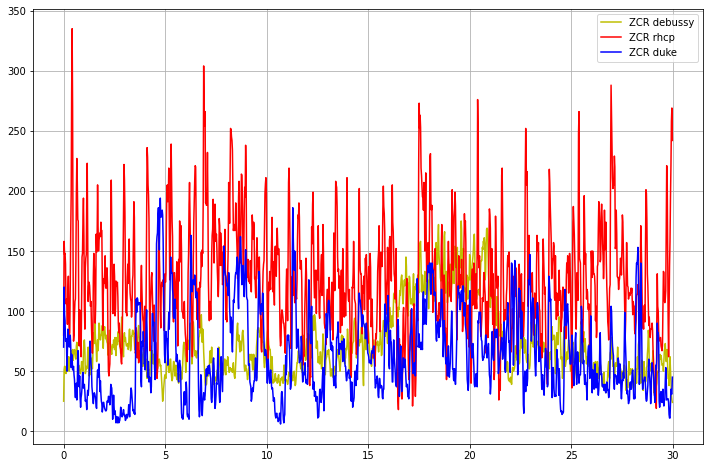

In [50]:
plt.figure(figsize=(12,8))
plt.plot(t, zcr_debussy*FRAME_SIZE, color='y', label='ZCR debussy')
plt.plot(t, zcr_rhcp*FRAME_SIZE, color='r', label='ZCR rhcp')
plt.plot(t, zcr_duke*FRAME_SIZE, color='b', label='ZCR duke')
plt.legend()
plt.grid('on')

In [51]:
#ZCR voice vs noise
audio_voice, sr_voice = librosa.load('audios/9- RMS energy and zero-crossing rate_audio_voice.wav', duration=15)
audio_noise, sr_noise = librosa.load('audios/noise.wav', duration=15)

In [52]:
Audio(audio_voice, rate=sr_voice)

In [53]:
Audio(audio_noise, rate=sr_noise)

In [54]:
zcr_voice= librosa.feature.zero_crossing_rate(audio_voice, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_noise= librosa.feature.zero_crossing_rate(audio_noise, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

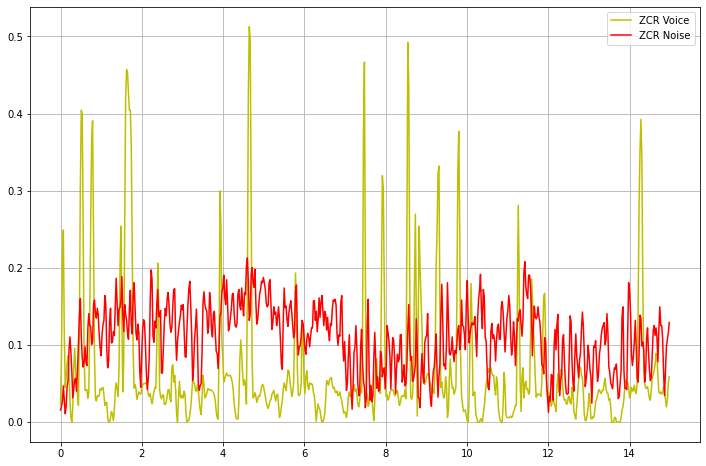

In [55]:
plt.figure(figsize=(12,8))
t = librosa.frames_to_time(range(0,zcr_voice.size), hop_length=HOP_LENGTH)
plt.plot(t, zcr_voice, color='y', label='ZCR Voice')
plt.plot(t, zcr_noise, color='r', label='ZCR Noise')
plt.legend()
plt.grid('on')